In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tomates.csv')
data_encoded = pd.get_dummies(data, columns=['tipo_cultivo'])
data_encoded

,ubicacion,tamanio,rdto,uso_fertilizantes,tipo_cultivo_Erecta.,tipo_cultivo_Rastrera.,tipo_cultivo_Semierecta.
0,1572,33997,0.8679,False,0,0,1
1,1059,80481,0.6079,False,0,0,1
2,1242,95781,0.9220,True,0,1,0
3,1286,98904,0.1078,False,1,0,0
4,1109,69298,0.0916,False,0,0,1
...,...,...,...,...,...,...,...
9995,1346,63349,0.0988,False,1,0,0
9996,1242,67465,0.3169,False,0,0,1
9997,1693,36885,0.0580,True,0,1,0
9998,1677,97367,0.4878,False,0,0,1


In [3]:
X = data_encoded.drop('rdto', axis=1)
y = data_encoded['rdto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [5]:
# Evaluar el rendimiento del modelo en los datos de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.16491290627000002


In [11]:
# Realizar predicciones sobre el rendimiento del cultivo en una finca específica
new_data = pd.DataFrame({'tipo_cultivo_Erecta.': [0],'tipo_cultivo_Rastrera.': [1],'tipo_cultivo_Semierecta.': [0], 'ubicacion': [4232], 'tamanio': [8978], 'uso_fertilizantes': ['False']})
new_data_encoded = pd.get_dummies(new_data)
y_pred_new = model.predict(new_data_encoded)
print('Predicción para nueva finca:', y_pred_new)

Predicción para nueva finca: [0.3813]


In [7]:
# Identificar los principales factores que influyen en el rendimiento del cultivo
importances = model.feature_importances_
print('Importancia de características:')
for i in range(len(X.columns)):
    print(X.columns[i], importances[i])

Importancia de características:
ubicacion 0.4058971281462914
tamanio 0.4902006567819816
uso_fertilizantes 0.05381562230983664
tipo_cultivo_Erecta. 0.02126619070494918
tipo_cultivo_Rastrera. 0.014110094166210587
tipo_cultivo_Semierecta. 0.014710307890730573


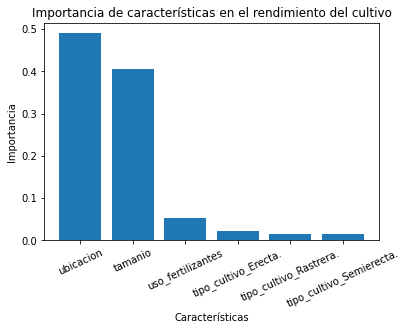

In [10]:
# Crear una lista de tuplas que contengan las características y sus respectivas importancias
feature_importances = [(X.columns[i], importances[i]) for i in range(len(X.columns))]

# Ordenar la lista de mayor a menor según la importancia
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Crear dos listas separadas con las características y sus respectivas importancias ordenadas
features = [x[0] for x in feature_importances]
importances = [x[1] for x in feature_importances]

# Crear el gráfico de barras
plt.bar(features, importances)
plt.xticks(rotation=25)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características en el rendimiento del cultivo')
plt.show()

In [85]:
#Aplicar validación cruzada para evaluar el rendimiento del modelo
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Se utiliza validación cruzada de k=10
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

print("R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R^2: -1.05 (+/- 0.22)


In [86]:
#Utilizar técnicas de selección de características 
from sklearn.feature_selection import SelectFromModel

# Se crea un modelo de árbol de decisión para seleccionar características
selector = SelectFromModel(DecisionTreeRegressor(), threshold='mean')

selector.fit(X_train, y_train)

# Se obtienen las características seleccionadas
selected_features = X_train.columns[selector.get_support()]

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [87]:
#Entrenar y evaluar el modelo con características seleccionadas:
tree_model_selected = DecisionTreeRegressor()

tree_model_selected.fit(X_train_selected, y_train)

# Se utiliza validación cruzada de k=10 con características seleccionadas
scores_selected = cross_val_score(tree_model_selected, X_train_selected, y_train, cv=10, scoring='r2')

print("R^2 (con características seleccionadas): %0.2f (+/- %0.2f)" % (scores_selected.mean(), scores_selected.std() * 2))

# Se evalúa el modelo en el conjunto de prueba
y_pred_selected = tree_model_selected.predict(X_test_selected)

print("R^2 (con características seleccionadas, en conjunto de prueba): %0.2f" % tree_model_selected.score(X_test_selected, y_test))


R^2 (con características seleccionadas): -1.08 (+/- 0.18)
R^2 (con características seleccionadas, en conjunto de prueba): -1.11


In [88]:
#Aplicar técnicas de ensamble, como el bosque aleatorio:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Se utiliza validación cruzada de k=10 con bosque aleatorio
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')

print("R^2 (con bosque aleatorio): %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

# Se entrena el modelo con el random forest
rf_model.fit(X_train, y_train)

# Se evalúa el modelo en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
print("R^2 (con bosque aleatorio, en conjunto de prueba): %0.2f" %rf_model.score(X_test, y_test))

R^2 (con bosque aleatorio): -0.15 (+/- 0.06)
R^2 (con bosque aleatorio, en conjunto de prueba): -0.11
